# Question 3: 
Try CNN (convolutional neural networks) on MNIST (or CIFAR or any dataset of your choice). Use the basic minibatch SGD as your learning algorithm, with and without regularizations (and compare them). Experiment with different regularization methods (dropout, L2-norm, augmentation, early stopping, etc). You may need to read Chapter-7, Chapter-8 and Chapter-9.

In [1]:
%pip install numpy matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Load the CIFAR dataset
We first install `tensorflow` and import the packages that will be used for this question. We selected CIFAR10 dataset,  with 60000 images of 10 classes (airplane, automobile, bird, cat deer, dog, frog, horse, ship, truck)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

2024-06-23 23:06:10.548916: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 23:06:10.548975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 23:06:10.550641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Here we showed the size of train data, test data. Each image has `32x32` pixels and 3 color channels. We also displayed and some images from the dataset. Before applying training CNN, we normalize the pixel values of the image between 0 and 1.

Train dataset: (50000, 32, 32, 3)
Test dataset: (10000, 32, 32, 3)


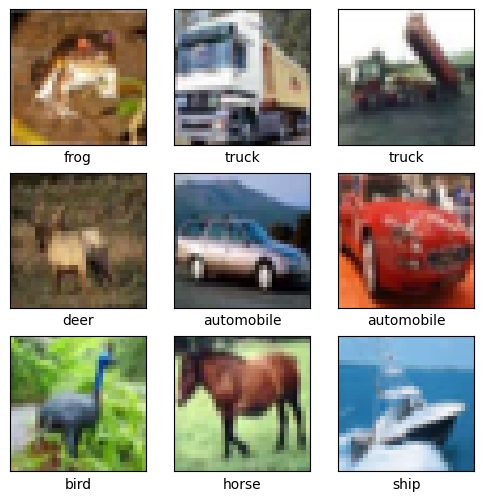

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Train dataset: {x_train.shape}")
print(f"Test dataset: {x_test.shape}")
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

epochs = 100

# Some sample images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


## CNN model without any regularization

- We followed the architecture with 3 convolutional layers with max-pooling layers, a flatten layer and 3 fully connected layers. For the layers, the activation used is Relu, except for the last output layer in which we used Softmax activation.
- For trainning this model, we use basic minibatch SGD with the batch size of 64. 20% of the train data will be used for validation. We trained the model using **100 epochs**.
- Finally, the test accuracy is reported on the test data.

In [4]:
model_1 = models.Sequential([
    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Fully connected with dropout
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    # Output
    layers.Dense(10, activation='softmax')
])

model_1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_1.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)

Epoch 1/100


I0000 00:00:1719183980.175809    5811 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 6s 6ms/step - loss: 2.1868 - accuracy: 0.2035 - val_loss: 2.0079 - val_accuracy: 0.2605
Epoch 2/100
625/625 [==============================] - 3s 4ms/step - loss: 1.9528 - accuracy: 0.2944 - val_loss: 1.9791 - val_accuracy: 0.2904
Epoch 3/100
625/625 [==============================] - 3s 4ms/step - loss: 1.7891 - accuracy: 0.3583 - val_loss: 1.6984 - val_accuracy: 0.3929
Epoch 4/100
625/625 [==============================] - 3s 4ms/step - loss: 1.6208 - accuracy: 0.4183 - val_loss: 1.6397 - val_accuracy: 0.4055
Epoch 5/100
625/625 [==============================] - 3s 4ms/step - loss: 1.5080 - accuracy: 0.4597 - val_loss: 1.5496 - val_accuracy: 0.4507
Epoch 6/100
625/625 [==============================] - 3s 4ms/step - loss: 1.4303 - accuracy: 0.4879 - val_loss: 1.3908 - val_accuracy: 0.5041
Epoch 7/100
625/625 [==============================] - 3s 4ms/step - loss: 1.3621 - accuracy: 0.5122 - val_loss: 1.3373 - val_accuracy: 0.5238
Epoch 8/100

In [5]:
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.6205 - accuracy: 0.6934
Test loss: 2.620516300201416
Test accuracy: 0.6934000253677368


## Early Stopping and Dropout
We use the same CNN architecture with 
- Additional 2 dropout layers with probability of 10% 
- Apply early stopping for training with patience = 3. After 3 epochs, if the validation loss cannot be improved, the training process stops early.

We observed that the accuracy on test dataset is higher than the CNN without any regularization, however the improvement can vary each run. As we can see, the training stopped earlier than 100 epochs which saves a lot of trainning time compared to the one without regularization

In [6]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
model_2 = models.Sequential([
    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Fully connected
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model_2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 2.2327 - accuracy: 0.1747 - val_loss: 2.0653 - val_accuracy: 0.2602
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0016 - accuracy: 0.2692 - val_loss: 1.9608 - val_accuracy: 0.2919
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8447 - accuracy: 0.3307 - val_loss: 1.6963 - val_accuracy: 0.4008
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6990 - accuracy: 0.3880 - val_loss: 1.6297 - val_accuracy: 0.4088
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5938 - accuracy: 0.4202 - val_loss: 1.6678 - val_accuracy: 0.4181
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.5234 - accuracy: 0.4489 - val_loss: 1.4307 - val_accuracy: 0.4887
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4653 - accuracy: 0.4688 - val_loss: 1.4034 - val_accuracy: 0.4965

In [13]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.8881 - accuracy: 0.7145
Test loss: 0.8881435394287109
Test accuracy: 0.7145000100135803


## Dropout and Data augmentation
For the final experiment, we apply data augmentation using `RandomTranslation`, `RandomTranslation`, `RandomContrast` from `tensorflow` which involves:

- Randomly translate the image: -10%, 10% vertically and horizontally.
- Randomly rotate the image with the angle ranging from `[-10% * 2pi, 10% * 2pi]`.
- RandomContrast adjust the contrast of an image.

We also achieved higher accuracy on testset in our execution compared to CNN without any regularization. However, the performance is lower than early stopping model.

As an example, we plot an augmented image and the original image

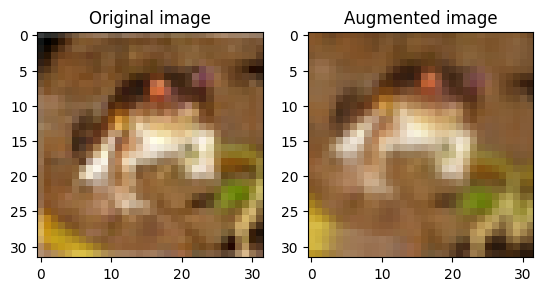

In [14]:
flip_and_rotation = models.Sequential([
    # Random augmentation.
    layers.RandomTranslation(height_factor=0.1,width_factor=0.1, seed=0), # shift -10%, 10% vertically and horizontally
    layers.RandomRotation(factor=0.1, seed=0), #rotate ([-10% * 2pi, 10% * 2pi])
    layers.RandomContrast(factor=0.1, seed=0),
])
augmented = flip_and_rotation(x_train[0])

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(x_train[0])

plt.subplot(1, 2, 2)
plt.title('Augmented image')
plt.imshow(augmented)

In [15]:
model_3 = models.Sequential([
    # Random augmentation.
    layers.RandomTranslation(height_factor=0.1,width_factor=0.1, seed=0),
    layers.RandomRotation(factor=0.1, seed=0),
    layers.RandomContrast(factor=0.1, seed=0),

    # Convolution layers
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Fully connected with dropout
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model_3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_3.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 5s 6ms/step - loss: 2.2473 - accuracy: 0.1638 - val_loss: 2.0796 - val_accuracy: 0.2548
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 2.0536 - accuracy: 0.2458 - val_loss: 2.0270 - val_accuracy: 0.2677
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.9605 - accuracy: 0.2878 - val_loss: 1.8298 - val_accuracy: 0.3533
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.8736 - accuracy: 0.3234 - val_loss: 1.8299 - val_accuracy: 0.3520
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7951 - accuracy: 0.3514 - val_loss: 1.6498 - val_accuracy: 0.4103
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.7250 - accuracy: 0.3777 - val_loss: 1.6524 - val_accuracy: 0.4122
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.6710 - accuracy: 0.3965 - val_loss: 1.6625 - val_accuracy: 0.4078

In [16]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.8762 - accuracy: 0.7072
Test loss: 0.8761619925498962
Test accuracy: 0.7071999907493591
